In [1]:
import pandas as pd
import matplotlib

In [3]:
df1 = pd.read_csv('Real Estate Data V21.csv')
df1.head(5)

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [4]:
df2 = df1.copy()
df2.shape

(14528, 9)

In [5]:
def find_bhk(input_desc):
    input_desc = str(input_desc)
    tokenised_list = list(input_desc.split(' '))
    for i in range(1,len(tokenised_list)):
        if tokenised_list[i].upper() == 'BHK':
            return(tokenised_list[i-1])
    return(-1)

In [6]:
a = df2.Description[1]
print(a)
print(find_bhk(a))

Looking for a 10 BHK Independent House for sale in Chennai? Your search ends here. Buy this 10 BHK property in Chennai's finest location, Pozhichalur. This is an owner listed property and there is no brokerage involved. This Independent House is available at a reasonable price of Rs 2.25 Cr. Maintenance charges in this property is Rs 2000. The built up area of this property is 7000 Square feet. It is spacious for a family and this property has a carpet area of 500 Square feet. There are 10 bedrooms and 9 bathroom. There are a number of reputed schools in the vicinity such as Peace On Green Ear...
10


In [7]:
df2['BHK'] = df2['Property Title'].apply(lambda x: find_bhk(x))
df2.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony,BHK
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes,4
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes,10
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No,3
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes,7
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes,2


In [8]:
df2.BHK.unique()

array(['4', '10', '3', '7', '2', '1', '6', '5', -1, '8', '1.5', '2.5',
       '9', '3.5', '5+', '10.5', '4.5', '9.5', '8.5', '7.5'], dtype=object)

In [9]:
df2.shape

(14528, 10)

In [10]:
df2[df2.BHK==-1].count()

Name              727
Property Title    727
Price             727
Location          727
Total_Area        727
Price_per_SQFT    727
Description       727
Baths             727
Balcony           727
BHK               727
dtype: int64

In [11]:
df3 = df2[df2.BHK!=-1]
df3.shape

(13801, 10)

In [12]:
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

In [13]:
df4 = df3[df3['BHK'].apply(is_int)]
df4.shape

(13621, 10)

In [14]:
df4.BHK.unique()

array(['4', '10', '3', '7', '2', '1', '6', '5', '8', '9'], dtype=object)

In [15]:
df4.groupby('Location')['Location'].agg('count')

Location
    Madhurangan Apartment ,Ambegaon, Pune                                  1
   Manganahalli    Sriram Layout ,Ullal Uppanagar, Bangalore               1
  Sec 2 Pooja apartment Bhosari ,Indrayani Nagar Sector 2, Bhosari,Pune    1
 A N SWAGATH,Gubbalala, Subramanyapura,Bangalore                           1
 A wing Sang,Ghartan Pada, Dahisar East,Mumbai                             1
                                                                          ..
west hills,Suriyammapet, Saidapet,Chennai                                  1
wind apartment ,New Ballygunge, Kasba,Kolkata                              1
yadari,Devasthanagalu, Varthur,Bangalore                                   1
yamuna sadan,Vishwakarma Colony, Pul Prahlad Pur,New Delhi                 1
yesh homes,Nemilichery, Chromepet,Chennai                                  1
Name: Location, Length: 6689, dtype: int64

In [35]:
df5 = df4.drop(['Name','Property Title','Description','Balcony'],axis='columns')
df5.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2


In [36]:
df5.isnull().sum()

Price             0
Location          0
Total_Area        0
Price_per_SQFT    0
Baths             0
BHK               0
dtype: int64

In [37]:
def find_price(x):
    try:
        return(x.split(' ')[1].upper())
    except:
        return(x[-1].upper())

In [38]:
df5['Price_Value'] = df5['Price'].apply(find_price)

In [39]:
df5.Price_Value.unique()

array(['CR', 'L', '0', 'LACS', 'K'], dtype=object)

In [40]:
df6 = df5[df5.Price_Value != '0']

In [41]:
df6.Price_Value.unique()

array(['CR', 'L', 'LACS', 'K'], dtype=object)

In [42]:
df6.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L


In [43]:
def find_price_amount(x):
    try:
        y = x.split(' ')[0]
        return(y[1:])
    except:
        return(-1)

In [44]:
df6['Price_amount'] = df6['Price'].apply(find_price_amount)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2404\937955666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Price_amount'] = df6['Price'].apply(find_price_amount)


In [45]:
df6.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0


In [46]:
def price_multiplier(x):
    if x == 'CR':
        return(10000000)
    elif x == 'L' or x == 'LACS':
        return(100000)
    elif x == 'K':
        return(1000)
    else:
        return(-1)

In [47]:
df6['PriceMultiplier'] = df6['Price_Value'].apply(price_multiplier)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2404\1118023132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['PriceMultiplier'] = df6['Price_Value'].apply(price_multiplier)


In [48]:
df6.PriceMultiplier.unique()

array([10000000,   100000,     1000], dtype=int64)

In [49]:
df7 = df6[df6.Price_Value != 'K']
df7.PriceMultiplier.unique()

array([10000000,   100000], dtype=int64)

In [50]:
df7.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99,10000000
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25,10000000
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0,10000000
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33,10000000
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100000


In [53]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [56]:
df7[~df7['Price_amount'].apply(is_float)]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier


In [61]:
df8 = df7.copy()

MemoryError: 

In [62]:
df8.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99,10000000
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25,10000000
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0,10000000
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33,10000000
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100000


In [65]:
df8['Location'].unique()

array(['Kanathur Reddikuppam, Chennai',
       'Ramanathan Nagar, Pozhichalur,Chennai',
       'Kasthuribai Nagar, West Tambaram,Chennai', ...,
       'Bulder floor,Jaitpur, New Delhi',
       'Krishna Park Extension, Tilak Nagar,New Delhi',
       'Lig flat rohini,Sector 16E, Sector 16 Rohini,New Delhi'],
      dtype=object)

In [66]:
df8['city'] = df8['Location'].apply(lambda x: x.split(',')[-1])
df8.head()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,4,4,CR,1.99,10000000,Chennai
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,6,10,CR,2.25,10000000,Chennai
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,3,3,CR,1.0,10000000,Chennai
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,5,7,CR,3.33,10000000,Chennai
4,₹48.0 L,"Avadi, Chennai",960,5000.0,3,2,L,48.0,100000,Chennai


In [67]:
df8['city'] = df8['city'].str.strip()
df8['city'].unique()

array(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Thane', 'Kolkata',
       'Pune', 'New Delhi'], dtype=object)

In [68]:
df8['Total_Area'].unique()

array([2583, 7000, 1320, ...,  783,  171,  472], dtype=int64)

In [70]:
print(df8['Price_per_SQFT'].unique())
print(df8['Baths'].unique())

[ 7700.  3210.  7580. ... 12110. 16860. 20470.]
[4 6 3 5 2 1]


In [71]:
location_stats = df8.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats_lessthan10 = location_stats[location_stats<10]
df8.Location = df8.Location.apply(lambda x: 'Others' if x in location_stats_lessthan10 else x)

In [72]:
df9 = df8.copy()

In [73]:
len(df9['Location'].unique())

181

In [74]:
df9.tail()

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city
14522,₹55.0 L,Others,405,13580.0,2,7,L,55.0,100000,New Delhi
14523,₹40.0 L,Others,1053,3800.0,3,2,L,40.0,100000,New Delhi
14524,₹14.0 L,Others,472,2970.0,2,1,L,14.0,100000,New Delhi
14525,₹30.0 L,Others,378,7940.0,1,1,L,30.0,100000,New Delhi
14526,₹60.0 L,Others,700,8570.0,2,3,L,60.0,100000,New Delhi


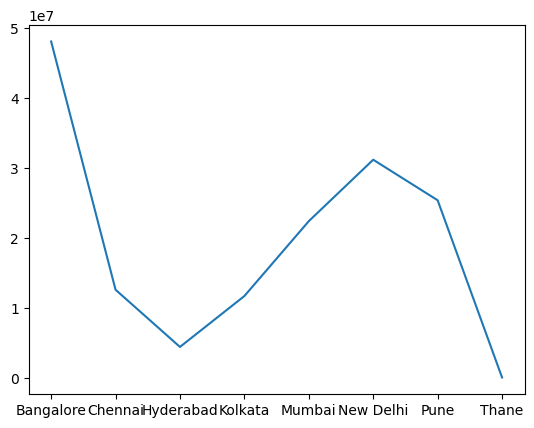

In [76]:
import matplotlib.pyplot as plt
x = []
y = []
z = []
for key,value in df9.groupby('city'):
    x.append(value.city.max())
    y.append(value.Price_per_SQFT.sum())
    
z = list(zip(x,y))

plt.plot(x[:],y[:]) 



In [78]:
df9.Price_per_SQFT.describe()

count     13617.000000
mean      11429.591687
std       47551.805888
min        1000.000000
25%        4500.000000
50%        6040.000000
75%        9170.000000
max      999000.000000
Name: Price_per_SQFT, dtype: float64

In [77]:
df9.loc[df9['Price_per_SQFT'] == 0]

,Price,Location,Total_Area,Price_per_SQFT,Baths,BHK,Price_Value,Price_amount,PriceMultiplier,city
